## Week 6 HW PCA

남승지

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

#### eigen decomposition을 이용한 PCA

In [308]:
# generate toy dataset
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1
angles = np.random.rand(m) *3 * np.pi/2 -0.5
X = np.empty((m,3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

X.shape

(60, 3)

In [309]:
# PCA 를 수행하기 위해 먼저 공분산 행렬 구하기
X_cen = X - X.mean(axis=0)  # scaling
X_cov = np.dot(X_cen.T, X_cen) / 59 # covariance matrix

print(X_cov)

[[0.69812855 0.17640539 0.12137931]
 [0.17640539 0.1801727  0.07253614]
 [0.12137931 0.07253614 0.04552382]]


In [310]:
# 공분산행렬 X_cov 에 대해 eigenvalue 와 eigenvector 구하기
w, v = np.linalg.eig(X_cov)

print('eigenvalue :', w)
print('eigenvector :', v)

eigenvalue : [0.77830975 0.1351726  0.01034272]
eigenvector : [[ 0.93636116  0.34027485 -0.08626012]
 [ 0.29854881 -0.90119108 -0.31420255]
 [ 0.18465208 -0.2684542   0.94542898]]


In [311]:
# 마지막으로 데이터에 대한 eigenvector들의 설명력을 확인
print('explained variance ratio :', w / w.sum())

explained variance ratio : [0.84248607 0.14631839 0.01119554]


#### Singular Value Decomposition을 이용한 PCA

In [312]:
# generate toy dataset
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1
angles = np.random.rand(m) *3 * np.pi/2 -0.5
X = np.empty((m,3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

X.shape

(60, 3)

In [313]:
# PCA 수행하기 위해 X를 스케일링
X_cen = X- X.mean(axis = 0) #scaling

print(X[0:5])
print(X_cen[0:5])

[[-1.01570027 -0.55091331 -0.26132626]
 [-0.00771675  0.59958572  0.03507755]
 [-0.95317135 -0.46453691 -0.24920288]
 [-0.92012304  0.21009593  0.02182381]
 [-0.76309739  0.158261    0.19152496]]
[[-1.03976771e+00 -7.60238460e-01 -3.32880482e-01]
 [-3.17841939e-02  3.90260570e-01 -3.64766659e-02]
 [-9.77238797e-01 -6.73862060e-01 -3.20757101e-01]
 [-9.44190485e-01  7.70779228e-04 -4.97304144e-02]
 [-7.87164831e-01 -5.10641487e-02  1.19970744e-01]]


In [314]:
# X_cen으로 signular value 와 singular vector를 구한다. 
U, D, V_t = np.linalg.svd(X_cen)

print('singular value:', D)
print('signular vector:\n', V_t.T)

singular value: [6.77645005 2.82403671 0.78116597]
signular vector:
 [[ 0.93636116 -0.34027485 -0.08626012]
 [ 0.29854881  0.90119108 -0.31420255]
 [ 0.18465208  0.2684542   0.94542898]]


In [315]:
# 설명력을 확인
print('explained variance ratio :', D ** 2 / np.sum(D**2))

explained variance ratio : [0.84248607 0.14631839 0.01119554]


#### Week 6 lab : PCA & FA

In [316]:
# load iris dataset
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names']+['target'])
df['target'] = df['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [317]:
df.shape

(150, 5)

In [318]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Principal Component Analysis

In [319]:
# 먼저 x 데이터 scaling
# Transform scales onto unit scale (mean = 0, variance = 1)
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = df.loc[:, features].values
y = df.loc[:, ['target']].values

X = StandardScaler().fit_transform(X) # Standardization using Standard Scaler

In [320]:
pd.DataFrame(data = X, columns = features).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


x가 평균이 0 , 분산이 1 이 되게 scaling 되었다. 

In [321]:
# 공분산행렬 구하기
cov_mat = np.cov(X.T)
print(cov_mat)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [322]:
# 공분산행렬에 대하여 eigen value 와 eigen vector 구하기 
eig_val, eig_vec = np.linalg.eig(cov_mat)
print('eigenvalue :', eig_val) # eigen values
print('eigenvector :', eig_vec) # eigen vectors

eigenvalue : [2.93808505 0.9201649  0.14774182 0.02085386]
eigenvector : [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


가장 큰 고유값 2.9380505이므로, 이 eigen value의 eigen vector가 제1주성분이 된다. 

In [323]:
# PCA 진행
pca = PCA(n_components=2) # PCA 선언: 2차원으로 차원축소
# 2차원으로 차원축소하므로 고유벡터 두개가 사용될것
X_pca = pca.fit_transform(X) # PCA 적합

In [324]:
df_pca = pd.DataFrame(data = X_pca, columns = ['PC 1','PC 2']) # PCA 적합한 X들
df_pca = pd.concat([df_pca, df[['target']]], axis =1) # y값 붙여주기

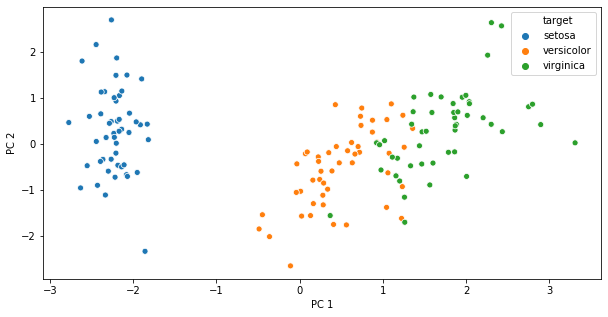

In [325]:
# PCA 결과를 시각화를 통해 확인
plt.figure(figsize = (10,5))
sns.scatterplot(x = df_pca['PC 1'], y = df_pca['PC 2'], hue = df['target'] )

In [326]:
# 주성분들의 설명력을 확인
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

PC1은 데이터의 약 72% 정도, PC2 는 23% 정도 설명한다.

#### Factor Analysis : scikit-learn의 Factor Analysis 이용

In [327]:
X = df.loc[:, features].values
fa = FactorAnalysis(n_components = 4)
X_fa = fa.fit_transform(X)

In [328]:
df_fa = pd.DataFrame(data=X_fa, columns=['Factor1', 'Factor2','Factor3','Factor4'])
df_fa.head()

,Factor1,Factor2,Factor3,Factor4
0,-1.226043,0.269089,0.0,0.0
1,-1.232343,-0.201804,0.0,0.0
2,-1.330547,-0.109966,0.0,0.0
3,-1.302661,-0.235704,0.0,0.0
4,-1.263690,0.312552,0.0,0.0


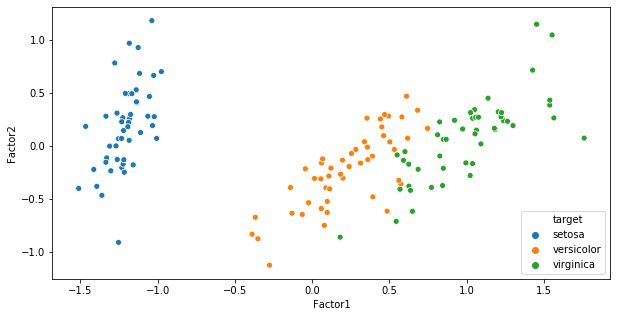

In [329]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x = df_fa['Factor1'], y = df_fa['Factor2'], hue=df['target'])

#### Factor Analysis : factor_analyzer의 FactorAnalyzer 이용

In [330]:
# Import the required modules
import pandas as pd
import sklearn.datasets
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [331]:
# Import the dataset
fpath = './bfi.csv'
df = pd.read_csv(fpath, index_col=0)
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [332]:
# Drop unnecessary columns
df.drop(['gender', 'education', 'age'], axis=1, inplace=True)
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [333]:
df = df.dropna()

In [334]:
# create a factor analyzer variable and perform factor analysis
fa = FactorAnalyzer(n_factors=6, rotation='varimax')

In [335]:
fa.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=6, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [336]:
ev, v = fa.get_eigenvalues()
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

In [337]:
v

array([ 4.62151801,  2.28722512,  1.58418949,  1.24487285,  0.99295601,
        0.52056474,  0.25772607,  0.20470979,  0.12171439,  0.10335508,
        0.07351889,  0.04212905,  0.03273147,  0.01708549, -0.00983342,
       -0.03318659, -0.04583048, -0.04895868, -0.06093545, -0.07926602,
       -0.0859421 , -0.09982342, -0.11016681, -0.12563658, -0.15339095])

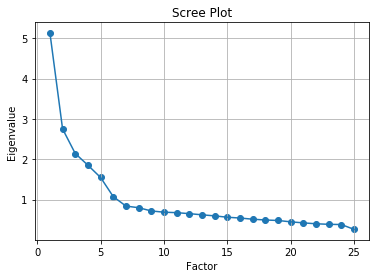

In [338]:
# Do a scree plot
xvals = range(1, df.shape[1]+1)

plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

### Week 6 HW 

In [339]:
from sklearn.datasets import load_wine
wine = load_wine()

In [340]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
sy = pd.Series(wine.target, dtype="category")
sy = sy.cat.rename_categories(wine.target_names)
df['class'] = sy
wine = df

In [341]:
wine.rename(columns = {'od280/od315_of_diluted_wines':'diluted'}, inplace=True)

In [342]:
wine = wine.replace({'class':'class_0'},{'class':0}).copy()
wine = wine.replace({'class':'class_1'},{'class':1}).copy()
wine = wine.replace({'class':'class_2'},{'class':2}).copy()

In [343]:
wine.shape

(178, 14)

In [344]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


##### train test split

train:test 를 7:3으로 나눠준다

In [345]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(wine.iloc[:, 0:13], wine['class'], test_size=0.3, random_state= 730)

In [346]:
print(X_train.shape) ; print(X_test.shape)

(124, 13)
(54, 13)


##### scaling

`StandardScaler()` 를 이용해 평균이 0 분산이 1 이 되도록 scaling을 해준다. 

In [347]:
from sklearn.preprocessing import StandardScaler
# Standardization using Standard Scaler
X_train = StandardScaler().fit_transform(X_train) 
X_test = StandardScaler().fit_transform(X_test)

In [348]:
Y_train.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

### PCA, FA 사용 전 logistic regression

In [349]:
from sklearn.linear_model import LogisticRegression

In [350]:
model = LogisticRegression()
model.fit(X_train, Y_train)

C:\Users\seung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\seung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [351]:
# train dataset score
print(model.score(X_train, Y_train))

1.0


In [352]:
# test dataset score
print(model.score(X_test, Y_test))

0.9629629629629629


### PCA

* eigenvalue로 scree plot을 그려 축소할 차원을 결정

In [353]:
cov_mat = np.cov(X_train.T)
eig_val, eig_vec = np.linalg.eig(cov_mat)

In [354]:
eig_val

array([4.51604542, 2.4913992 , 1.65531389, 0.88039257, 0.900197  ,
       0.71687719, 0.57927361, 0.1102893 , 0.31799026, 0.28757119,
       0.26392439, 0.17893692, 0.20748012])

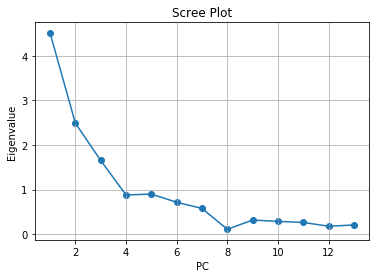

In [355]:
# Do a scree plot
xvals = range(1, wine.shape[1])

plt.scatter(xvals, eig_val)
plt.plot(xvals, eig_val)
plt.title('Scree Plot')
plt.xlabel('PC')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

**4차원**으로 차원축소 결정!

* PCA 

In [356]:
# PCA 진행
pca = PCA(n_components=4) # PCA 선언: 4차원으로 차원축소

# train으로 pca fitting
pcamodel = pca.fit(X_train)
X_pca = pcamodel.transform(X_train) # PCA 적합

In [360]:
wine_pca = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
wine_pca.head()

,PC1,PC2,PC3,PC4
0,2.369041,-2.221376,0.360421,-0.554173
1,2.768398,-2.771814,-0.684248,0.187155
2,-1.985225,0.926987,-1.783856,-1.621852
3,-1.574427,2.034326,0.765968,1.373197
4,2.796636,-0.414027,0.919681,-0.814610


In [357]:
# 주성분들의 설명력을 확인
ex = pcamodel.explained_variance_ratio_
ex

array([0.34458659, 0.19010056, 0.12630497, 0.06868749])

In [358]:
sum(pcamodel.explained_variance_ratio_)

0.7296796069740711

In [359]:
# 위에서 fitting한 모델로 test set을 PCA 적합
X_pca_test = pcamodel.transform(X_test)

* pca 적합한 data로 logistic regression

In [361]:
pca_logistic = LogisticRegression()
pca_logistic.fit(X_pca, Y_train) # train으로 fitting

C:\Users\seung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\seung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

* score 확인

In [362]:
print(pca_logistic.score(X_pca, Y_train))

0.9919354838709677


In [363]:
print(pca_logistic.score(X_pca_test, Y_test))

0.9629629629629629


### FA

In [364]:
# Import the required modules
import pandas as pd
import sklearn.datasets
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

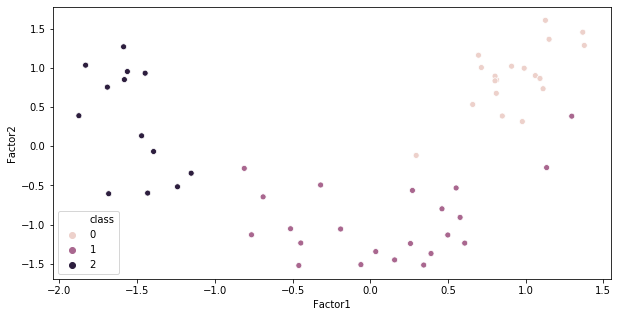

In [365]:
fa2 = FactorAnalyzer(n_factors = 2, rotation= 'varimax')
fa2model = fa2.fit(X_train)
X_fa2 = fa2model.transform(X_train)
X_fa2_test = fa2model.transform(X_test)
df_fa2_test = pd.DataFrame(data=X_fa2_test, columns=['Factor1', 'Factor2'])
plt.figure(figsize=(10, 5))
sns.scatterplot(x = df_fa2_test['Factor1'], y = df_fa2_test['Factor2'], hue=Y_test)

* FA 4차원으로 축소

In [367]:
# create a factor analyzer variable and perform factor analysis
fa = FactorAnalyzer(n_factors=4, rotation='varimax')

Loading matrix의 각 loading 값을 최대한 서로 다르게 회전해주는 **varimax**사용

In [368]:
# train으로 fa fitting
famodel = fa.fit(X_train) 
# fa 적합
X_fa = famodel.transform(X_train)

In [369]:
# 위에서 fitting한 모델로 test set을 FA 적합
X_fa_test = famodel.transform(X_test)

In [370]:
wine_fa = pd.DataFrame(data = X_fa, columns = ['F1', 'F2', 'F3', 'F4'])
wine_fa.head()

,F1,F2,F3,F4
0,-0.519085,0.360760,-1.354439,0.858920
1,-0.823841,0.807665,-1.710344,-0.564120
2,-0.466026,-0.626563,0.864607,-2.110748
3,0.995349,-1.162377,0.769279,-0.103492
4,-1.176433,-0.145755,-0.294648,0.939049


In [371]:
loadings = np.around(famodel.loadings_,3)
loadings = pd.DataFrame(loadings, index = wine.columns[:13], columns =['FA1','FA2','FA3','FA4'] )
loadings

,FA1,FA2,FA3,FA4
alcohol,0.058,0.756,-0.124,-0.071
malic_acid,-0.231,0.005,-0.485,0.137
ash,0.113,0.317,0.015,0.941
alcalinity_of_ash,-0.125,-0.376,-0.262,0.669
magnesium,0.155,0.371,-0.023,0.070
total_phenols,0.867,0.223,0.235,-0.024
flavanoids,0.834,0.188,0.424,0.001
nonflavanoid_phenols,-0.369,-0.168,-0.266,0.365
proanthocyanins,0.686,0.128,0.082,-0.020
color_intensity,-0.114,0.604,-0.567,0.092


In [372]:
ev, v = famodel.get_eigenvalues()
ev

array([4.47962569, 2.47130727, 1.64196459, 0.89293734, 0.87329263,
       0.71109592, 0.57460205, 0.31542582, 0.28525207, 0.26179597,
       0.20580689, 0.17749388, 0.10939988])

* fa 적합한 data로 logistic regression

In [373]:
fa_logistic = LogisticRegression()
fa_logistic.fit(X_fa, Y_train)

C:\Users\seung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\seung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

* score 확인

In [374]:
print(fa_logistic.score(X_fa, Y_train))

0.9838709677419355


In [375]:
print(fa_logistic.score(X_fa_test, Y_test))

0.9444444444444444


### PCA, FA 전후 분류모델 성능 비교

In [376]:
# train 
print("Logistic Train score:", model.score(X_train, Y_train))
# pca train
print("PCA Train score:", pca_logistic.score(X_pca, Y_train))
# fa train
print("FA Train score:", fa_logistic.score(X_fa, Y_train))
# test 
print("Logistic Test score:", model.score(X_test, Y_test))
# pca test
print("PCA Test score:", pca_logistic.score(X_pca_test, Y_test))
# fa test
print("FA Test score:", fa_logistic.score(X_fa_test, Y_test))

Logistic Train score: 1.0
PCA Train score: 0.9919354838709677
FA Train score: 0.9838709677419355
Logistic Test score: 0.9629629629629629
PCA Test score: 0.9629629629629629
FA Test score: 0.9444444444444444
